In [3]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

def get_flattened_data(file_path):
    with open(file_path) as file:
        data = json.load(file)
    flattened_data = []
    for key, values in data.items():
        for entry in values:
            if isinstance(entry, dict):
                entry['key'] = key
                flattened_data.append(entry)
            else:
                flattened_data.append({'key': key, 'latency': entry})

    # Convert flattened data to a pandas DataFrame
    df = pd.DataFrame(flattened_data)
    return df

def get_scatter_plot(file_path, y_axis):
    df = get_flattened_data(file_path)

    # Map keys to numerical values for coloring
    key_mapping = {key: idx for idx, key in enumerate(df['key'].unique())}
    df['key_color'] = df['key'].map(key_mapping)

    # Create a scatter plot
    scatter = plt.scatter(df['rows'], df[y_axis], c=df['key_color'], cmap='viridis')
    return scatter, key_mapping

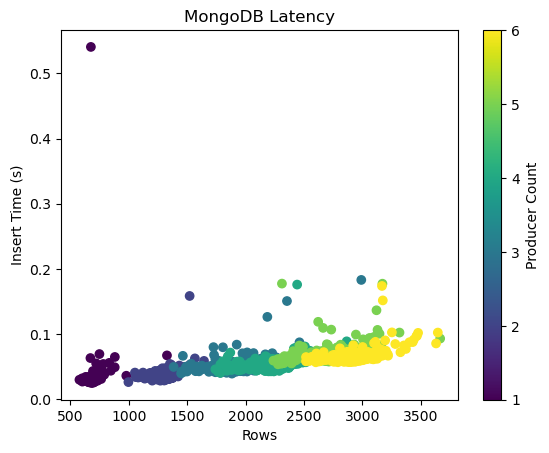

In [62]:
# MongoDB latency scatter


# Load the JSON data
scatter, key_mapping = get_scatter_plot('data/mongo/latencies_batch_w_mongo.json', 'insert_time')

plt.xlabel('Rows')
plt.ylabel('Insert Time')
plt.title('MongoDB Latency')

# Create a color bar with the correct labels
cbar = plt.colorbar(scatter, ticks=range(len(key_mapping)))
cbar.ax.set_yticklabels(key_mapping.keys())
cbar.set_label('Producer Count')

plt.show()

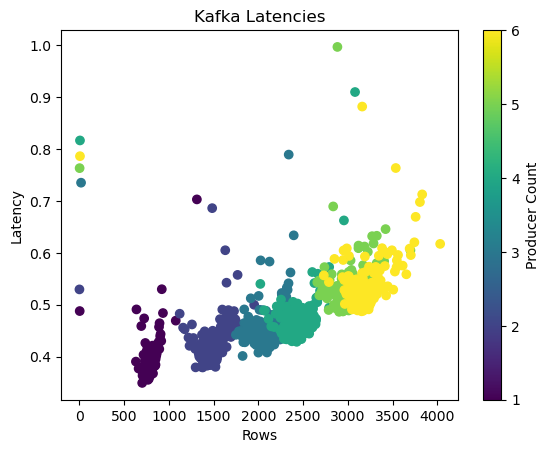

In [59]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def graph_sql_latency_scatter():
    # Load the JSON data
    with open('data/sql/latencies_batch_w_sql.json') as f:
        data = json.load(f)

    # Flatten the JSON structure
    flattened_data = []
    for key, values in data.items():
        for entry in values:
            if isinstance(entry, dict):
                entry['key'] = key
                flattened_data.append(entry)
            else:
                flattened_data.append({'key': key, 'latency': entry})

    # Convert flattened data to a pandas DataFrame
    df = pd.DataFrame(flattened_data)

    # Map keys to numerical values for coloring
    key_mapping = {key: idx for idx, key in enumerate(df['key'].unique())}
    df['key_color'] = df['key'].map(key_mapping)

    # Create a scatter plot
    scatter = plt.scatter(df['rows'], df['latency'], c=df['key_color'], cmap='viridis')
    plt.xlabel('Rows')
    plt.ylabel('Latency')
    plt.title('Kafka Latencies')

    # Create a color bar with the correct labels
    cbar = plt.colorbar(scatter, ticks=range(len(key_mapping)))
    cbar.ax.set_yticklabels(key_mapping.keys())
    cbar.set_label('Producer Count')

    plt.show()
graph_sql_latency_scatter()

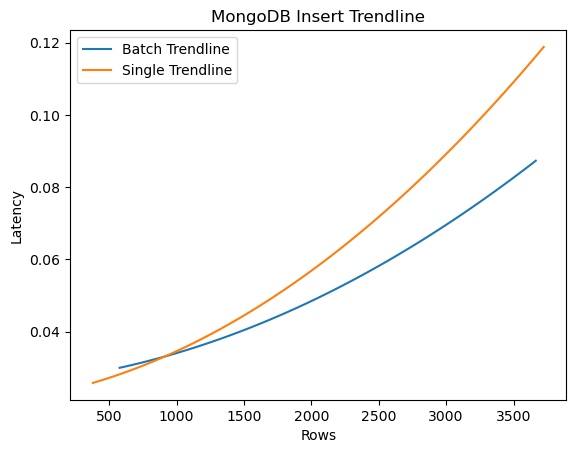

In [5]:

def graph_mongo_single_vs_batch():
    # Load the JSON data
    df_batch = get_flattened_data('data/mongo/latencies_batch_w_mongo.json')
    df_single = get_flattened_data('data/mongo/latencies_single_w_mongo.json')

    # Fit a polynomial trendline
    batch_poly = np.poly1d(np.polyfit(df_batch['rows'], df_batch['insert_time'], 2))
    single_poly = np.poly1d(np.polyfit(df_single['rows'], df_single['insert_time'], 2))

    # Generate x values for the trendline
    x_batch = np.linspace(df_batch['rows'].min(), df_batch['rows'].max(), 100)
    x_single = np.linspace(df_single['rows'].min(), df_single['rows'].max(), 100)

    # Plot the trendline
    plt.plot(x_batch, batch_poly(x_batch), label='Batch Trendline')
    plt.plot(x_single, single_poly(x_single), label='Single Trendline')
    plt.xlabel('Rows')
    plt.ylabel('Latency')
    plt.title('MongoDB Insert Trendline')
    plt.legend()
    plt.show()

graph_mongo_single_vs_batch()

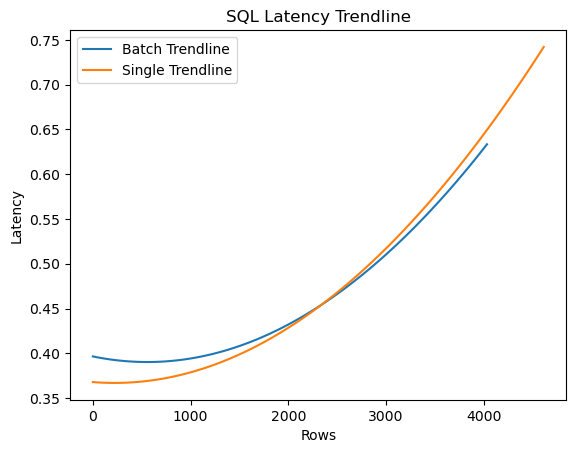

In [8]:
def sql_single_vs_batch():
    # Load the JSON data
    df_batch = get_flattened_data('data/sql/latencies_batch_w_sql.json')
    df_single = get_flattened_data('data/sql/latencies_single_w_sql.json')

    # Fit a polynomial trendline
    batch_poly = np.poly1d(np.polyfit(df_batch['rows'], df_batch['latency'], 2))
    single_poly = np.poly1d(np.polyfit(df_single['rows'], df_single['latency'], 2))

    # Generate x values for the trendline
    x_batch = np.linspace(df_batch['rows'].min(), df_batch['rows'].max(), 100)
    x_single = np.linspace(df_single['rows'].min(), df_single['rows'].max(), 100)

    # Plot the trendline
    plt.plot(x_batch, batch_poly(x_batch), label='Batch Trendline')
    plt.plot(x_single, single_poly(x_single), label='Single Trendline')
    plt.xlabel('Rows')
    plt.ylabel('Latency')
    plt.title('SQL Latency Trendline')
    plt.legend()
    plt.show()
sql_single_vs_batch()

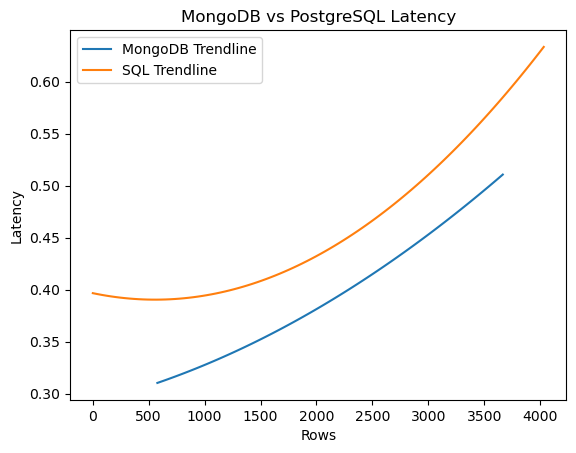

In [9]:

def mongo_vs_sql_batch():
    # Load the JSON data
    df_sql = get_flattened_data('data/sql/latencies_batch_w_sql.json')
    df_mongo = get_flattened_data('data/mongo/latencies_batch_w_mongo.json')

    # Fit a polynomial trendline
    mongo_poly = np.poly1d(np.polyfit(df_mongo['rows'], df_mongo['latency'], 2))
    sql_poly = np.poly1d(np.polyfit(df_sql['rows'], df_sql['latency'], 2))

    # Generate x values for the trendline
    x_batch = np.linspace(df_mongo['rows'].min(), df_mongo['rows'].max(), 100)
    x_single = np.linspace(df_sql['rows'].min(), df_sql['rows'].max(), 100)

    # Plot the trendline
    plt.plot(x_batch, mongo_poly(x_batch), label='MongoDB Trendline')
    plt.plot(x_single, sql_poly(x_single), label='SQL Trendline')
    plt.xlabel('Rows')
    plt.ylabel('Latency')
    plt.title('MongoDB vs PostgreSQL Latency')

    plt.legend()
    plt.show()

mongo_vs_sql_batch()

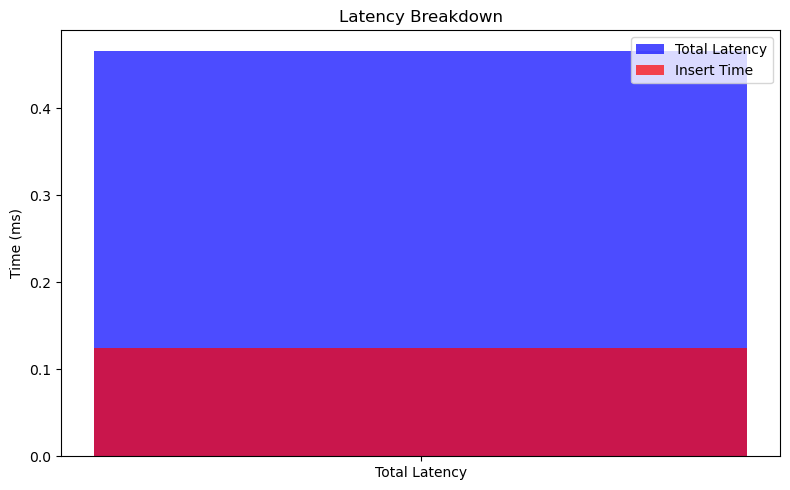

In [60]:
def insert_time_vs_latency():
    df = get_flattened_data('data/sql/latencies_single_w_sql.json')
    # Get the average insert_time and average latency from df
    avg_insert_time = df['insert_time'].mean()
    avg_latency = df['latency'].mean()

    plt.figure(figsize=(8, 5))

    # Plot total latency bar
    plt.bar('Total Latency', avg_latency, color='blue', alpha=0.7, label='Total Latency')

    # Overlay insert time bar at the bottom
    plt.bar('Total Latency', avg_insert_time, color='red', alpha=0.7, label='Insert Time')

    plt.ylabel('Time (ms)')
    plt.title('Latency Breakdown')
    plt.legend()
    plt.tight_layout()
    plt.show()

insert_time_vs_latency()